In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Online Sales Data.csv')

In [3]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [4]:
data.tail()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,2024-08-27,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


In [5]:
data.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [7]:
data.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [8]:
data.shape

(240, 9)

In [9]:
data.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [10]:
data['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [11]:
sales_per_product = data.groupby('Product Category')['Units Sold'].sum()
print(sales_per_product)

Product Category
Beauty Products     46
Books              114
Clothing           145
Electronics         66
Home Appliances     59
Sports              88
Name: Units Sold, dtype: int64


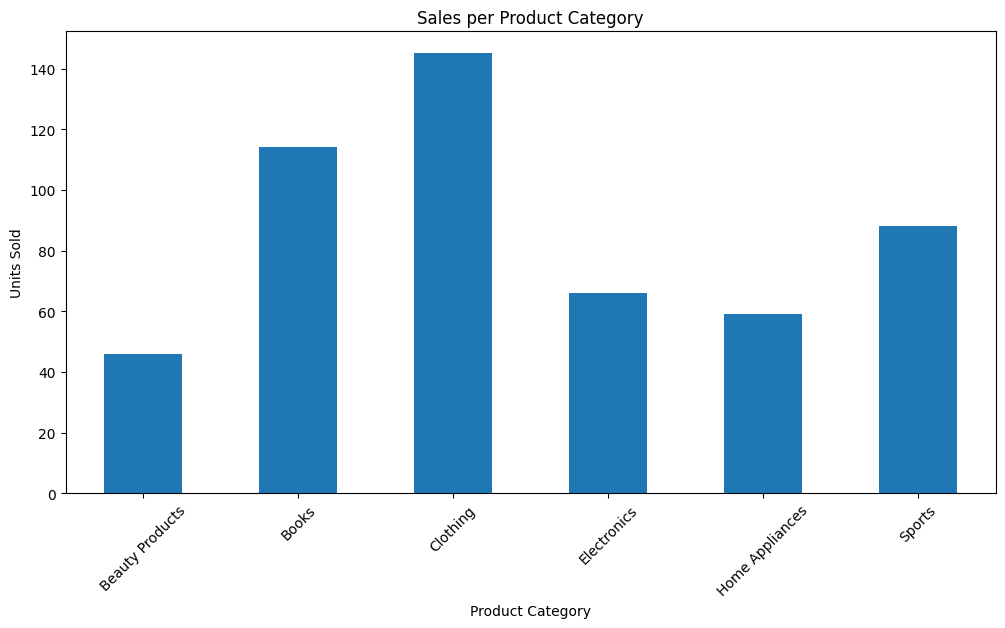

In [12]:
plt.figure(figsize=(12, 6))
sales_per_product.plot(kind='bar')
plt.title('Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

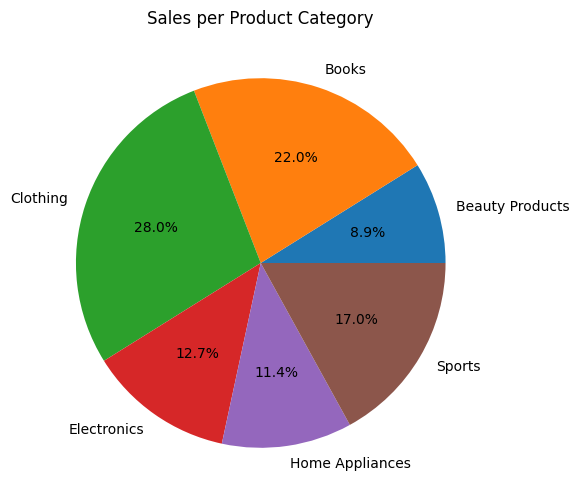

In [13]:
plt.figure(figsize=(12, 6))
plt.pie(sales_per_product, labels=sales_per_product.index, autopct="%1.1f%%")
plt.title('Sales per Product Category')
plt.show()


In [14]:
sales_per_region_product = data.groupby(['Region', 'Product Category'])['Units Sold'].sum()
for region in sales_per_region_product.index.levels[0]:
  print(f"Sales per product category in {region}:")
  print(sales_per_region_product.loc[region])
  print()


Sales per product category in Asia:
Product Category
Clothing    145
Sports       88
Name: Units Sold, dtype: int64

Sales per product category in Europe:
Product Category
Beauty Products    46
Home Appliances    59
Name: Units Sold, dtype: int64

Sales per product category in North America:
Product Category
Books          114
Electronics     66
Name: Units Sold, dtype: int64



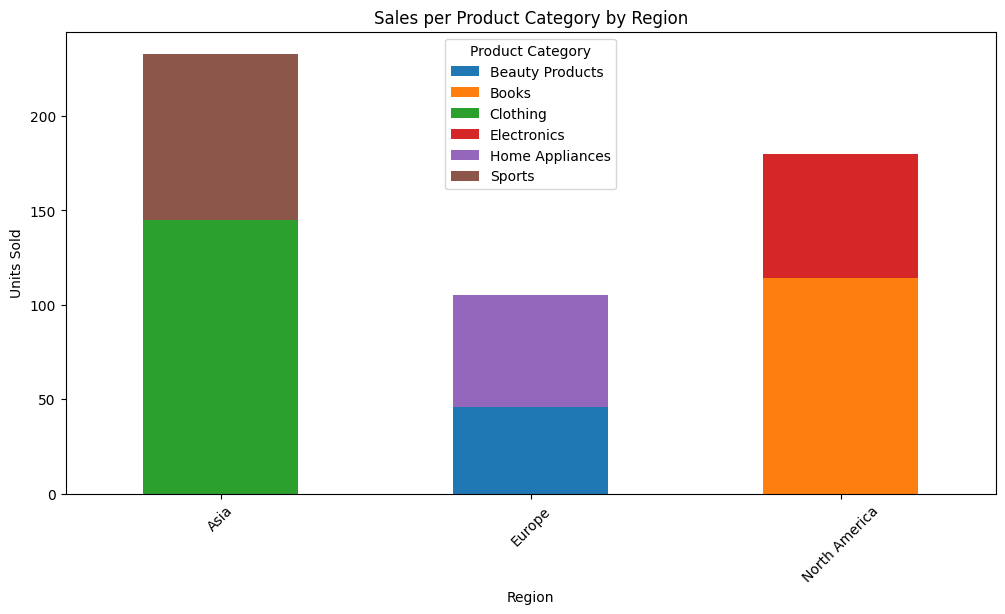

In [15]:
sales_per_region_product = data.groupby(['Region', 'Product Category'])['Units Sold'].sum().unstack()
sales_per_region_product.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales per Product Category by Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

In [16]:
average_sales_per_region = data.groupby('Region')['Units Sold'].mean()

print("Average sales per region:")
print(average_sales_per_region)

Average sales per region:
Region
Asia             2.9125
Europe           1.3125
North America    2.2500
Name: Units Sold, dtype: float64


In [17]:
total_sales_per_category = data.groupby('Product Category')['Units Sold'].sum()

In [18]:
print("Total sales per product category:")
print(total_sales_per_category)

Total sales per product category:
Product Category
Beauty Products     46
Books              114
Clothing           145
Electronics         66
Home Appliances     59
Sports              88
Name: Units Sold, dtype: int64


In [19]:
percentage_sales_per_category = (total_sales_per_category / total_sales_per_category.sum()) * 100

In [20]:
print("Percentage sales per product category:")
print(percentage_sales_per_category)

Percentage sales per product category:
Product Category
Beauty Products     8.880309
Books              22.007722
Clothing           27.992278
Electronics        12.741313
Home Appliances    11.389961
Sports             16.988417
Name: Units Sold, dtype: float64


In [21]:
numerical_data = data[['Units Sold', 'Unit Price', 'Total Revenue']]

In [22]:
correlation_matrix = numerical_data.corr()

In [23]:
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
               Units Sold  Unit Price  Total Revenue
Units Sold       1.000000   -0.308583      -0.171151
Unit Price      -0.308583    1.000000       0.930350
Total Revenue   -0.171151    0.930350       1.000000


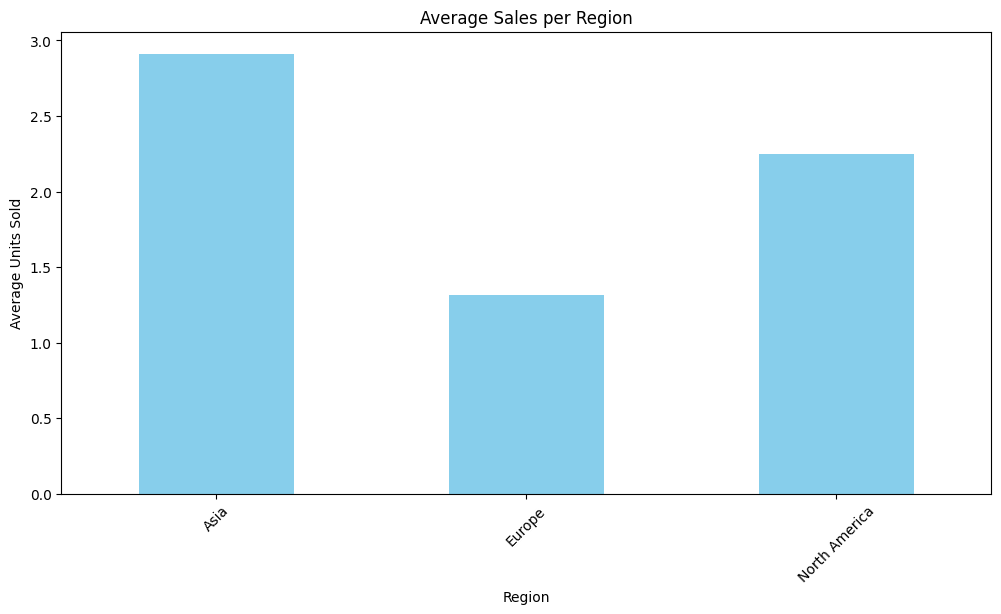

In [24]:
plt.figure(figsize=(12, 6))
average_sales_per_region.plot(kind='bar', color='skyblue')
plt.title('Average Sales per Region')
plt.xlabel('Region')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45)
plt.show()

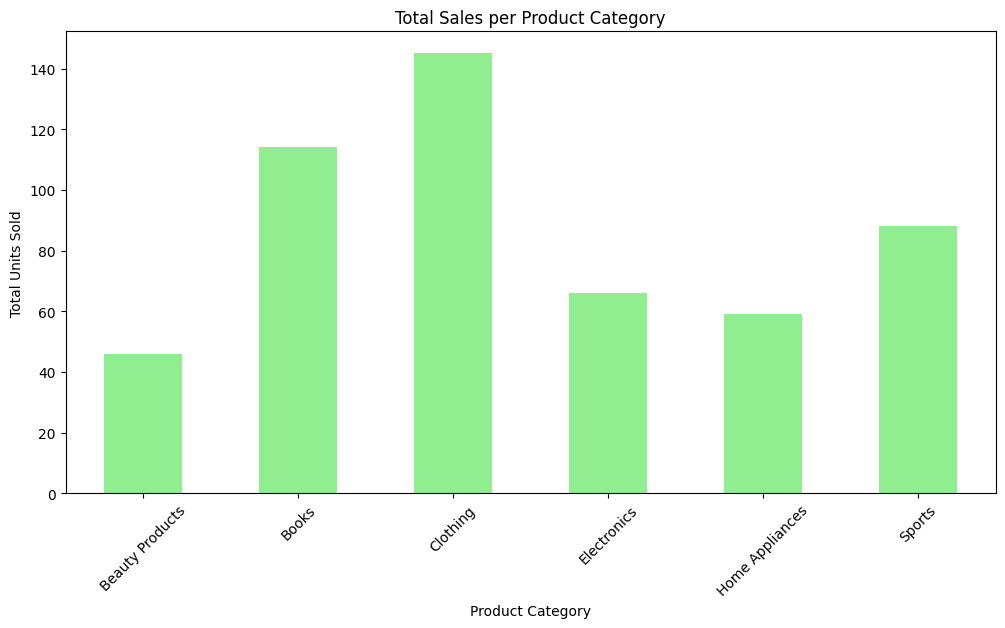

In [25]:
plt.figure(figsize=(12, 6))
total_sales_per_category.plot(kind='bar', color='lightgreen')
plt.title('Total Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()


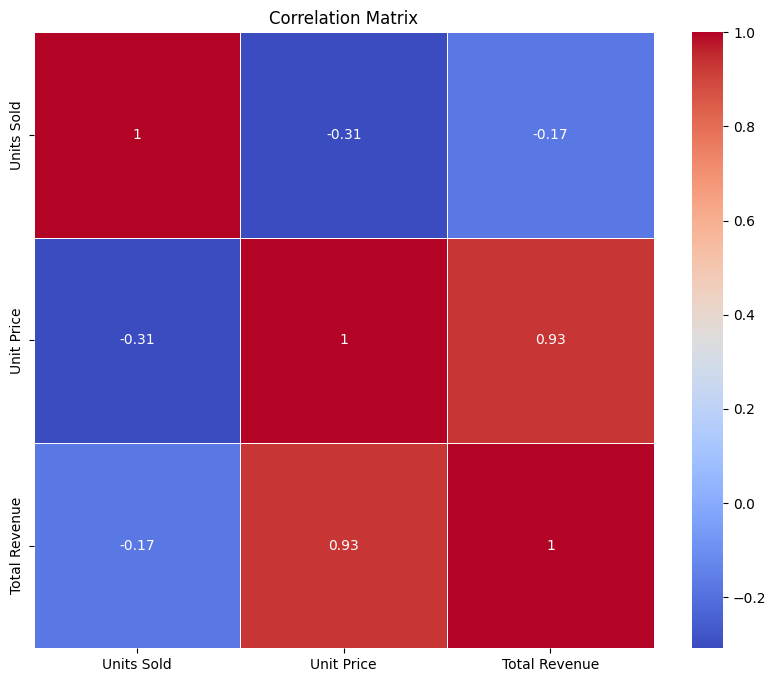

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


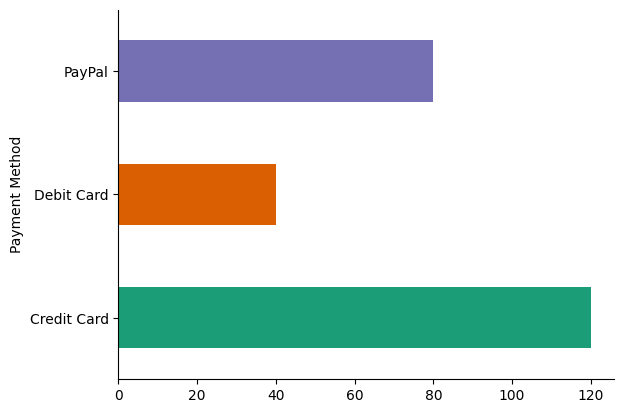

In [28]:
data.groupby('Payment Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
top_product = data.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).head(1)
print(f"Top selling product: {top_product.index[0]} with {top_product.values[0]} units sold")

Top selling product: Hanes ComfortSoft T-Shirt with 10 units sold


In [30]:
highest_revenue_category = data.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False).head(1)
print(f"Product category with highest total revenue: {highest_revenue_category.index[0]} with {highest_revenue_category.values[0]} units sold")

Product category with highest total revenue: Electronics with 34982.41 units sold


In [31]:
total_revenue_per_region = data.groupby('Region')['Total Revenue'].sum()
print("Total revenue per region:")
print(total_revenue_per_region)

Total revenue per region:
Region
Asia             22455.45
Europe           21268.06
North America    36844.34
Name: Total Revenue, dtype: float64
